In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from toolbox.kubevizResults import kubevizResults as kv
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_style('ticks')

In [3]:
data_dir = 'C:/Users/ariel/Workspace/GASP/High-z/PSB Regions/Data/'
highz_dir = 'C:/Users/ariel/Workspace/GASP/High-z/'
plots_dir = 'C:/Users/ariel/Workspace/GASP/High-z/PSB regions/Plots/classification/'

sample = pd.read_csv(data_dir + 'galaxy_sample.csv')
properties_table = pd.read_csv(data_dir + 'sample_properties.csv')
cnn_models = pickle.load(open(data_dir + 'cnn_models.pkl', 'rb'))

wl = np.arange(3680, 6001, 3)

In [4]:
categories = np.array(cnn_models['category'])
spectra = np.array(cnn_models['spectra'])

In [5]:
cnn_categories = np.array([[0, 1] if category=='Quenched' else [1, 0] for category in categories])
print(cnn_categories)

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(spectra, cnn_categories, test_size=0.3, shuffle=True)

In [7]:
X_train[0].shape

(1857,)

In [8]:
X_train.shape

(3369, 1857)

In [9]:
model_cnn = keras.models.Sequential([
            keras.layers.Conv1D(32, kernel_size=3, padding="same", strides=2, activation="relu", input_shape=(1857, 1)),
            keras.layers.Conv1D(16, kernel_size=3, padding="same", strides=3, activation="relu"),
            keras.layers.MaxPool1D(),
            keras.layers.Flatten(),
            keras.layers.Dropout(0.25),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(2, activation="softmax")
])

model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_cnn.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 929, 32)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 310, 16)           1552      
                                                                 
 max_pooling1d (MaxPooling1  (None, 155, 16)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2480)              0         
                                                                 
 dropout (Dropout)           (None, 2480)              0         
                                                                 
 dense (Dense)               (None, 64)                158784    
                                                     

In [30]:
model_ann = keras.models.Sequential([
            keras.layers.Input(shape=(1857, )),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dense(2, activation="softmax")
])

model_ann.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_ann.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               237824    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 2)                 34        
                                                                 
Total params: 248722 (971.57 KB)
Trainable params: 248722 (971.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model_ann = keras.models.Sequential([
            keras.layers.Input(shape=(300, 300, 3)),
            keras.layers.Dense(100, activation="relu"),
            keras.layers.Dense(2, activation="softmax")
])

model_ann.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_ann.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 300, 300, 100)     400       
                                                                 
 dense_44 (Dense)            (None, 300, 300, 2)       202       
                                                                 
Total params: 602 (2.35 KB)
Trainable params: 602 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model_ann.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
109/109 [==============================] - 2s 8ms/step - loss: 0.5928 - accuracy: 0.6708 - val_loss: 0.3352 - val_accuracy: 0.8495
Epoch 2/50
109/109 [==============================] - 1s 6ms/step - loss: 0.2363 - accuracy: 0.9283 - val_loss: 0.1067 - val_accuracy: 0.9879
Epoch 3/50
109/109 [==============================] - 1s 6ms/step - loss: 0.1057 - accuracy: 0.9706 - val_loss: 0.0689 - val_accuracy: 0.9805
Epoch 4/50
109/109 [==============================] - 1s 6ms/step - loss: 0.0433 - accuracy: 0.9928 - val_loss: 0.0610 - val_accuracy: 0.9940
Epoch 5/50
109/109 [==============================] - 1s 6ms/step - loss: 0.1545 - accuracy: 0.9574 - val_loss: 0.0811 - val_accuracy: 0.9946
Epoch 6/50
109/109 [==============================] - 1s 6ms/step - loss: 0.0651 - accuracy: 0.9836 - val_loss: 0.0350 - val_accuracy: 0.9913
Epoch 7/50
109/109 [==============================] - 1s 6ms/step - loss: 0.0659 - accuracy: 0.9770 - val_loss: 0.0407 - val_accuracy: 0.9960
Epoch 

In [10]:
checkpoint = keras.callbacks.ModelCheckpoint('Data/cnn_checkpoints/checkpoint_{epoch:02d}', save_freq='epoch')
model_cnn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=checkpoint)

Epoch 1/50


105/106 [============================>.] - ETA: 0s - loss: 0.4778 - accuracy: 0.7613INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_01\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_01\assets


106/106 [==============================] - 5s 33ms/step - loss: 0.4769 - accuracy: 0.7619 - val_loss: 0.2020 - val_accuracy: 0.9848
Epoch 2/50
104/106 [============================>.] - ETA: 0s - loss: 0.1561 - accuracy: 0.9522INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_02\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_02\assets


106/106 [==============================] - 3s 29ms/step - loss: 0.1549 - accuracy: 0.9528 - val_loss: 0.0695 - val_accuracy: 0.9910
Epoch 3/50
103/106 [============================>.] - ETA: 0s - loss: 0.0730 - accuracy: 0.9836INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_03\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_03\assets


106/106 [==============================] - 3s 30ms/step - loss: 0.0724 - accuracy: 0.9837 - val_loss: 0.0540 - val_accuracy: 0.9896
Epoch 4/50
103/106 [============================>.] - ETA: 0s - loss: 0.0540 - accuracy: 0.9885INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_04\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_04\assets


106/106 [==============================] - 3s 27ms/step - loss: 0.0532 - accuracy: 0.9887 - val_loss: 0.0290 - val_accuracy: 0.9938
Epoch 5/50
103/106 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.9909INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_05\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_05\assets


106/106 [==============================] - 3s 28ms/step - loss: 0.0393 - accuracy: 0.9911 - val_loss: 0.0275 - val_accuracy: 0.9938
Epoch 6/50
105/106 [============================>.] - ETA: 0s - loss: 0.0299 - accuracy: 0.9943INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_06\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_06\assets


106/106 [==============================] - 3s 28ms/step - loss: 0.0299 - accuracy: 0.9944 - val_loss: 0.0155 - val_accuracy: 0.9952
Epoch 7/50
105/106 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9955INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_07\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_07\assets


106/106 [==============================] - 3s 32ms/step - loss: 0.0199 - accuracy: 0.9955 - val_loss: 0.0125 - val_accuracy: 0.9986
Epoch 8/50
104/106 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9955INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_08\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_08\assets


106/106 [==============================] - 4s 34ms/step - loss: 0.0186 - accuracy: 0.9953 - val_loss: 0.0118 - val_accuracy: 0.9958
Epoch 9/50
106/106 [==============================] - ETA: 0s - loss: 0.0207 - accuracy: 0.9958INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_09\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_09\assets


106/106 [==============================] - 3s 32ms/step - loss: 0.0207 - accuracy: 0.9958 - val_loss: 0.0092 - val_accuracy: 0.9986
Epoch 10/50
106/106 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9979INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_10\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_10\assets


106/106 [==============================] - 3s 28ms/step - loss: 0.0099 - accuracy: 0.9979 - val_loss: 0.0082 - val_accuracy: 0.9986
Epoch 11/50
104/106 [============================>.] - ETA: 0s - loss: 0.0102 - accuracy: 0.9979INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_11\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_11\assets


106/106 [==============================] - 3s 27ms/step - loss: 0.0102 - accuracy: 0.9979 - val_loss: 0.0084 - val_accuracy: 0.9986
Epoch 12/50
105/106 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9979INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_12\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_12\assets


106/106 [==============================] - 3s 30ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0128 - val_accuracy: 0.9965
Epoch 13/50
105/106 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9991INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_13\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_13\assets


106/106 [==============================] - 3s 29ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0104 - val_accuracy: 0.9986
Epoch 14/50
105/106 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9985INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_14\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_14\assets


106/106 [==============================] - 3s 28ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0183 - val_accuracy: 0.9972
Epoch 15/50
103/106 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9979INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_15\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_15\assets


106/106 [==============================] - 4s 34ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0080 - val_accuracy: 0.9986
Epoch 16/50
102/106 [===========================>..] - ETA: 0s - loss: 0.0072 - accuracy: 0.9985INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_16\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_16\assets


106/106 [==============================] - 3s 25ms/step - loss: 0.0070 - accuracy: 0.9985 - val_loss: 0.0077 - val_accuracy: 0.9979
Epoch 17/50
104/106 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9991INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_17\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_17\assets


106/106 [==============================] - 3s 29ms/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0069 - val_accuracy: 0.9979
Epoch 18/50
105/106 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9982INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_18\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_18\assets


106/106 [==============================] - 3s 25ms/step - loss: 0.0084 - accuracy: 0.9982 - val_loss: 0.0062 - val_accuracy: 0.9986
Epoch 19/50
105/106 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9991INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_19\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_19\assets


106/106 [==============================] - 3s 28ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0105 - val_accuracy: 0.9986
Epoch 20/50
104/106 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_20\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_20\assets


106/106 [==============================] - 3s 27ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9986
Epoch 21/50
104/106 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9997INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_21\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_21\assets


106/106 [==============================] - 3s 26ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0111 - val_accuracy: 0.9986
Epoch 22/50
103/106 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9997INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_22\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_22\assets


106/106 [==============================] - 3s 27ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 23/50
106/106 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9994INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_23\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_23\assets


106/106 [==============================] - 3s 28ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0128 - val_accuracy: 0.9986
Epoch 24/50
104/106 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9985INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_24\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_24\assets


106/106 [==============================] - 3s 27ms/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.0184 - val_accuracy: 0.9979
Epoch 25/50
105/106 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9997INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_25\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_25\assets


106/106 [==============================] - 3s 30ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.0100 - val_accuracy: 0.9986
Epoch 26/50
105/106 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_26\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_26\assets


106/106 [==============================] - 5s 46ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0048 - val_accuracy: 0.9986
Epoch 27/50
106/106 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9994INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_27\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_27\assets


106/106 [==============================] - 6s 56ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0086 - val_accuracy: 0.9986
Epoch 28/50
105/106 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9976INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_28\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_28\assets


106/106 [==============================] - 7s 67ms/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 0.0072 - val_accuracy: 0.9986
Epoch 29/50
105/106 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9997INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_29\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_29\assets


106/106 [==============================] - 7s 64ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.0141 - val_accuracy: 0.9979
Epoch 30/50
105/106 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9994INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_30\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_30\assets


106/106 [==============================] - 6s 54ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0165 - val_accuracy: 0.9979
Epoch 31/50
106/106 [==============================] - ETA: 0s - loss: 7.3724e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_31\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_31\assets


106/106 [==============================] - 6s 54ms/step - loss: 7.3724e-04 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9986
Epoch 32/50
104/106 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9991INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_32\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_32\assets


106/106 [==============================] - 4s 36ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 0.0115 - val_accuracy: 0.9986
Epoch 33/50
104/106 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9991INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_33\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_33\assets


106/106 [==============================] - 5s 43ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0112 - val_accuracy: 0.9986
Epoch 34/50
105/106 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9991INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_34\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_34\assets


106/106 [==============================] - 3s 30ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0075 - val_accuracy: 0.9986
Epoch 35/50
105/106 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9973INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_35\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_35\assets


106/106 [==============================] - 4s 33ms/step - loss: 0.0134 - accuracy: 0.9973 - val_loss: 0.0120 - val_accuracy: 0.9986
Epoch 36/50
104/106 [============================>.] - ETA: 0s - loss: 9.9822e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_36\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_36\assets


106/106 [==============================] - 3s 30ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0098 - val_accuracy: 0.9986
Epoch 37/50
105/106 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9994INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_37\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_37\assets


106/106 [==============================] - 3s 27ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0108 - val_accuracy: 0.9986
Epoch 38/50
104/106 [============================>.] - ETA: 0s - loss: 9.6189e-04 - accuracy: 0.9997INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_38\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_38\assets


106/106 [==============================] - 3s 28ms/step - loss: 9.5216e-04 - accuracy: 0.9997 - val_loss: 0.0105 - val_accuracy: 0.9986
Epoch 39/50
106/106 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9994INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_39\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_39\assets


106/106 [==============================] - 3s 26ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0193 - val_accuracy: 0.9972
Epoch 40/50
104/106 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_40\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_40\assets


106/106 [==============================] - 3s 26ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9993
Epoch 41/50
106/106 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_41\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_41\assets


106/106 [==============================] - 3s 31ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0101 - val_accuracy: 0.9986
Epoch 42/50
106/106 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_42\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_42\assets


106/106 [==============================] - 3s 27ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0092 - val_accuracy: 0.9986
Epoch 43/50
104/106 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9973INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_43\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_43\assets


106/106 [==============================] - 3s 25ms/step - loss: 0.0073 - accuracy: 0.9973 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 44/50
105/106 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9976INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_44\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_44\assets


106/106 [==============================] - 3s 24ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0108 - val_accuracy: 0.9986
Epoch 45/50
105/106 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9976INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_45\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_45\assets


106/106 [==============================] - 3s 25ms/step - loss: 0.0064 - accuracy: 0.9976 - val_loss: 0.0128 - val_accuracy: 0.9979
Epoch 46/50
103/106 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9985INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_46\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_46\assets


106/106 [==============================] - 3s 30ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0248 - val_accuracy: 0.9965
Epoch 47/50
106/106 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9979INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_47\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_47\assets


106/106 [==============================] - 3s 26ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.0055 - val_accuracy: 0.9986
Epoch 48/50
103/106 [============================>.] - ETA: 0s - loss: 6.6131e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_48\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_48\assets


106/106 [==============================] - 3s 26ms/step - loss: 6.4746e-04 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9979
Epoch 49/50
103/106 [============================>.] - ETA: 0s - loss: 1.7223e-04 - accuracy: 1.0000INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_49\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_49\assets


106/106 [==============================] - 3s 25ms/step - loss: 1.6888e-04 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9979
Epoch 50/50
106/106 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9991INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_50\assets


INFO:tensorflow:Assets written to: Data/cnn_checkpoints\checkpoint_50\assets


106/106 [==============================] - 3s 27ms/step - loss: 0.0091 - accuracy: 0.9991 - val_loss: 0.0057 - val_accuracy: 0.9986


In [8]:
loss = model_ann.history.history['loss']
validation_loss = model_ann.history.history['val_loss']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(loss, label='Training')
ax.plot(validation_loss, label='Test')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend(frameon=False)

plt.show()

NameError: name 'model_ann' is not defined

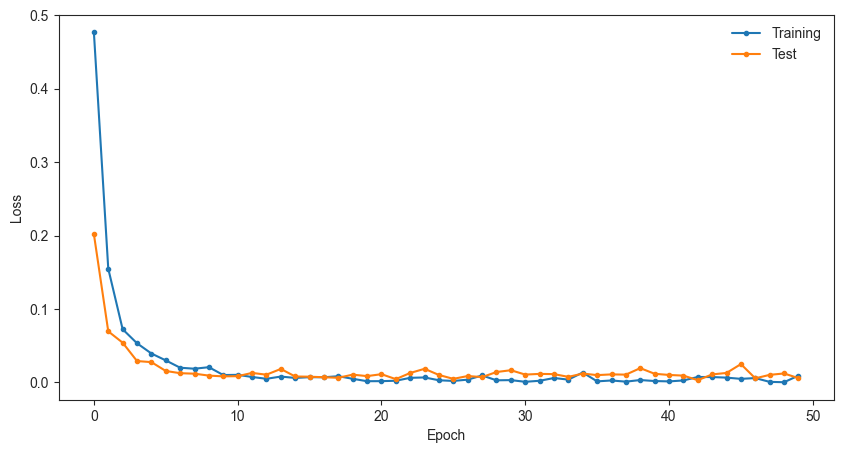

In [11]:
loss = model_cnn.history.history['loss']
validation_loss = model_cnn.history.history['val_loss']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(loss, label='Training', marker='.')
ax.plot(validation_loss, label='Test', marker='.')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend(frameon=False)

In [16]:
model_cnn.load_weights('Data/cnn_checkpoints/checkpoint_07')

In [41]:
test = model_cnn.predict(X_test)

47/47 [==============================] - 0s 4ms/step


In [44]:
model_cnn.load_weights('Data/cnn_checkpoints/checkpoint_11')

In [49]:
test = model_cnn.predict(np.array([X_test[0]]))

1/1 [==============================] - 0s 34ms/step


In [50]:
test

array([[1.0000000e+00, 2.8081387e-12]], dtype=float32)

In [42]:
conv = keras.layers.Convolution1D(filters=32, kernel_size=5, padding="same", activation="relu", input_shape=(1, 1, 774))

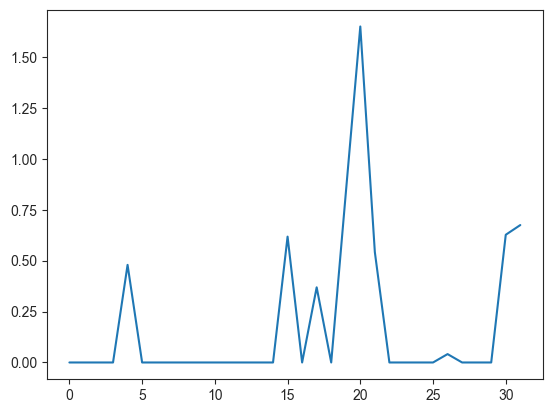

In [43]:
test = conv(X_train[300].reshape(1, 1, 774))
plt.plot(np.arange(0, test.shape[2], 1), test[0][0])

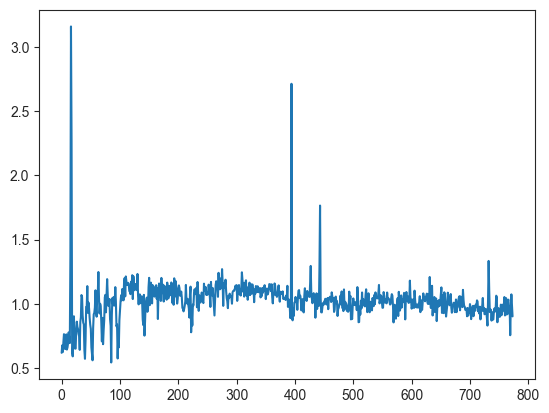

In [31]:
plt.plot(np.arange(0, len(spectra[0]), 1), X_train[300])

In [55]:
extractor = keras.Model(inputs=model_cnn.inputs,
                        outputs=[layer.output for layer in model_cnn.layers])
features = extractor(X_train)